# Credit scoring with Deep Learning

In this tutorial, we will demonstrate how to use Deep Learning algorithms to resolve credit scoring problems.

## Long short-term memory (LSTM)

### Dataset
Australia credit (http://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)) <br>
Descriptions: 15 attributes, 690 instances. <br>


### Library
There are severval frameworks used for Deep Learning: Theano, Tensorflow, PyTorch, Keras...

In our tutorial, we will use Tensorflow and Keras.

#### Tensorflow
TensorFlow was developed by researchers and engineers from the Google Brain team. It is far and away the most commonly used software library in the field of deep learning.

Install tensorflow: 
- For CPU only: pip install tensorflow
- For CUDA-enabled GPU cards:pip install tensorflow-gpu

#### Keras
Keras is written in Python and can run on top of TensorFlow (as well as CNTK and Theano). 

Install Keras: pip install keras

You can refer to the official Keras documentation (keras.io) to get a detailed understanding of how the framework works


Let's start!!!

In [139]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Embedding
from keras.optimizers import RMSprop

In [140]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [150]:
#load dataset
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat",delim_whitespace=True, header=None)
df=dataframe.fillna(dataframe.mean())
dataset=df.values

In [151]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


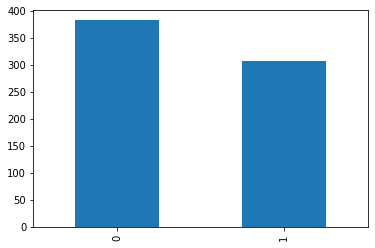

In [155]:
df.iloc[:,14].value_counts().plot(kind='bar');

In [144]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [145]:
no_feature=len(dataset[0])-1

In [146]:
#split data into input X and output Y variable
X=scaled_data[:,0:no_feature].astype(float)
Y=scaled_data[:,no_feature]

In [132]:
train_size=int(len(X)*0.8)

In [133]:
X_train = X[:train_size]
y_train = Y[:train_size]
X_test = X[train_size:]
y_test = Y[train_size:]
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [134]:
model = Sequential()
model=Sequential()
model.add(Embedding(24,output_dim=24))
model.add(LSTM(24))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, None, 24)          576       
_________________________________________________________________
lstm_49 (LSTM)               (None, 24)                4704      
_________________________________________________________________
dropout_49 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 25        
Total params: 5,305
Trainable params: 5,305
Non-trainable params: 0
_________________________________________________________________


In [135]:
history = model.fit(X_train, y_train,  batch_size=10,  epochs=100, verbose=1)

Epoch 1/100
552/552 [==============================] - 5s 10ms/step - loss: 0.6886 - acc: 0.5580
Epoch 2/100
552/552 [==============================] - 1s 1ms/step - loss: 0.6402 - acc: 0.6504
Epoch 3/100
552/552 [==============================] - 1s 1ms/step - loss: 0.5623 - acc: 0.7264A: 0s - loss: 0.5637 - acc: 0.728
Epoch 4/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4980 - acc: 0.7971
Epoch 5/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4641 - acc: 0.8116
Epoch 6/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4768 - acc: 0.7953
Epoch 7/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4340 - acc: 0.8116
Epoch 8/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4539 - acc: 0.8098
Epoch 9/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4290 - acc: 0.8207
Epoch 10/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4585 - acc: 0.8225
Epoch

552/552 [==============================] - 1s 1ms/step - loss: 0.3712 - acc: 0.8478
Epoch 84/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3903 - acc: 0.8569
Epoch 85/100
552/552 [==============================] - 1s 2ms/step - loss: 0.3833 - acc: 0.8551
Epoch 86/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3930 - acc: 0.8370
Epoch 87/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3864 - acc: 0.8533
Epoch 88/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3721 - acc: 0.8533
Epoch 89/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3802 - acc: 0.8569
Epoch 90/100
552/552 [==============================] - 1s 1ms/step - loss: 0.4023 - acc: 0.8388
Epoch 91/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3960 - acc: 0.8514
Epoch 92/100
552/552 [==============================] - 1s 1ms/step - loss: 0.3876 - acc: 0.8442
Epoch 93/100
552/552 [=====================

In [136]:
score,acc = model.evaluate(X_test, y_test, batch_size=1)
print('Test accuracy:', acc)

138/138 [==============================] - 5s 35ms/step
Test accuracy: 0.8623188138008118
